In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [2]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

print(f"Shape of training data: {df_train.shape}. isnull = {df_train.isnull().sum().sum()}")
print(f"Shape of testing data: {df_test.shape} isnull = {df_train.isnull().sum().sum()}")


Shape of training data: (42000, 785). isnull = 0
Shape of testing data: (28000, 784) isnull = 0


Testing data does not have labels

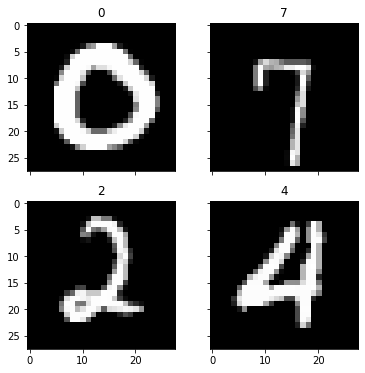

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey=True, figsize=(6,6))

ax1.imshow(df_train.loc[4,df_train.columns[1]:df_train.columns[-1]].to_numpy().reshape((28,28)), cmap='gray')
ax2.imshow(df_train.loc[50,df_train.columns[1]:df_train.columns[-1]].to_numpy().reshape((28,28)), cmap='gray')
ax3.imshow(df_train.loc[600,df_train.columns[1]:df_train.columns[-1]].to_numpy().reshape((28,28)), cmap='gray')
ax4.imshow(df_train.loc[7000,df_train.columns[1]:df_train.columns[-1]].to_numpy().reshape((28,28)), cmap='gray')

ax1.set(title=df_train.loc[4,df_train.columns[0]])
ax2.set(title=df_train.loc[50,df_train.columns[0]])
ax3.set(title=df_train.loc[600,df_train.columns[0]])
ax4.set(title=df_train.loc[7000,df_train.columns[0]])
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,1:], df_train.iloc[:,0], test_size=0.33, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28140, 784)
(28140,)
(13860, 784)
(13860,)


In [5]:
X_train = X_train.to_numpy().reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.to_numpy().reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Data augmentation

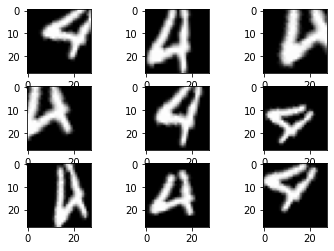

In [6]:
#Example of ImageDataGenerator in Keras

datagen = ImageDataGenerator(rescale=1./255,zoom_range=[0.5,1.1], rotation_range=45, width_shift_range=5, height_shift_range=5)
sample = df_train.loc[7000,df_train.columns[1]:df_train.columns[-1]].to_numpy()
sample = sample.reshape((1,28,28,1))
it = datagen.flow(sample, batch_size=1)

for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].reshape(28,28)
    plt.imshow(image, cmap='gray')
plt.show()

In [23]:
train_datagenerator = ImageDataGenerator(rescale=1./255,zoom_range=[0.5,1.1], rotation_range=45, width_shift_range=5, height_shift_range=5)
test_datagenerator = ImageDataGenerator(rescale=1./255)

traingen = train_datagenerator.flow(X_train, y_train, batch_size = 32, shuffle = False)
testgen = test_datagenerator.flow(X_test, y_test, batch_size = 32, shuffle = False)


In [24]:
model = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [25]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



model.fit_generator(
        traingen,
        steps_per_epoch=128,
        epochs=50,
        validation_data=testgen,
        validation_steps=64)


Epoch 1/50
128/128 [==============================] - 2s 15ms/step - loss: 2.2331 - accuracy: 0.1680 - val_loss: 1.1731 - val_accuracy: 0.7476
Epoch 2/50
128/128 [==============================] - 2s 14ms/step - loss: 1.8226 - accuracy: 0.3758 - val_loss: 0.7820 - val_accuracy: 0.8657
Epoch 3/50
128/128 [==============================] - 2s 14ms/step - loss: 1.5808 - accuracy: 0.4708 - val_loss: 0.6235 - val_accuracy: 0.9014
Epoch 4/50
128/128 [==============================] - 2s 13ms/step - loss: 1.4165 - accuracy: 0.5327 - val_loss: 0.5725 - val_accuracy: 0.9053
Epoch 5/50
128/128 [==============================] - 2s 14ms/step - loss: 1.3413 - accuracy: 0.5477 - val_loss: 0.5530 - val_accuracy: 0.8760
Epoch 6/50
128/128 [==============================] - 2s 14ms/step - loss: 1.3226 - accuracy: 0.5705 - val_loss: 0.4640 - val_accuracy: 0.9209
Epoch 7/50
128/128 [==============================] - 2s 15ms/step - loss: 1.2228 - accuracy: 0.5974 - val_loss: 0.4206 - val_accuracy: 0.9150

In [26]:
model.save_weights('digit_ocr_model.h5')

### Example predictions

[Text(0.5, 1.0, 'Prediction = 3 (0.9927)')]

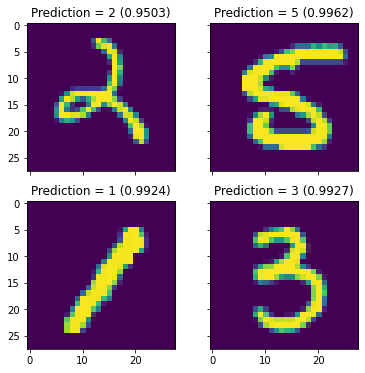

In [47]:
sample1 = X_test[324].reshape((1,28,28,1))
sample2 = X_test[987].reshape((1,28,28,1))
sample3 = X_test[111].reshape((1,28,28,1))
sample4 = X_test[222].reshape((1,28,28,1))

it = datagen.flow(sample, batch_size=1)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey=True, figsize=(6,6))

ax1.imshow(sample1.reshape(28,28))
ax2.imshow(sample2.reshape(28,28))
ax3.imshow(sample3.reshape(28,28))
ax4.imshow(sample4.reshape(28,28))

pred1 = model.predict_generator(test_datagenerator.flow(sample1, batch_size = 1))
pred2 = model.predict_generator(test_datagenerator.flow(sample2, batch_size = 1))
pred3 = model.predict_generator(test_datagenerator.flow(sample3, batch_size = 1))
pred4 = model.predict_generator(test_datagenerator.flow(sample4, batch_size = 1))

ax1.set(title=f"Prediction = {np.argmax(pred1)} ({np.max(pred1):.4f})")
ax2.set(title=f"Prediction = {np.argmax(pred2)} ({np.max(pred2):.4f})")
ax3.set(title=f"Prediction = {np.argmax(pred3)} ({np.max(pred3):.4f})")
ax4.set(title=f"Prediction = {np.argmax(pred4)} ({np.max(pred4):.4f})")